In [1]:
# 标准回归函数和数据导入函数
from numpy import *

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []; labelMat =[]
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

def standRegres(xArr, yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0: # 调用linalg.det()计算矩阵行列式
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat) # matrix.I表示求逆矩阵
    return ws

In [2]:
xArr, yArr = loadDataSet('ex0.txt')

In [3]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [4]:
ws = standRegres(xArr, yArr)

In [5]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [6]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

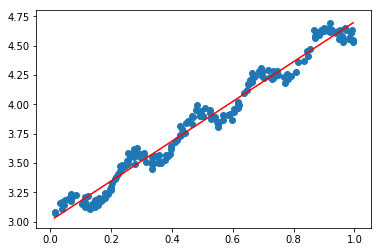

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:,1], yHat, c='red')
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:,0].flatten().A[0])
plt.show()

In [8]:
yHat = xMat * ws

In [9]:
corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [10]:
# 局部加权线性回归函数
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m))) # eye(m)生成m*m的单位阵
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat    

In [11]:
xArr, yArr = loadDataSet('ex0.txt')

In [12]:
yArr[0]

3.176513

In [13]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

In [14]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.20175729]])

In [15]:
# 得到数据集里所有点的估计
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

In [16]:
yHat

array([3.20200665, 3.75940186, 4.53670134, 4.25050564, 4.56094936,
       3.93721635, 3.53392289, 3.15405352, 3.12604366, 3.14881027,
       3.47887849, 4.1229893 , 4.24110737, 3.47648492, 4.6329319 ,
       3.96601531, 3.52772681, 3.15257242, 4.09411431, 3.4534635 ,
       3.21009102, 3.19948401, 4.63028986, 4.2958291 , 3.08502796,
       3.50177161, 3.14348409, 3.36386424, 3.99136073, 3.89052382,
       3.15925294, 3.15754913, 3.85062092, 4.63492639, 4.56823397,
       3.59158542, 3.59663089, 4.60657847, 3.6768816 , 4.64165522,
       3.18193434, 4.23203805, 3.5596501 , 3.45576256, 3.83408612,
       3.1760528 , 3.49935304, 3.92943323, 3.90635534, 4.23852193,
       4.21692815, 3.50430539, 3.22426953, 4.27810533, 3.51013716,
       3.50537991, 3.85983822, 4.27479904, 3.91450832, 3.57019624,
       3.15346336, 4.22473636, 4.23785765, 4.23873712, 3.17953817,
       3.99733495, 3.55097598, 3.56148314, 4.24145117, 3.16047076,
       3.16317973, 4.22052596, 3.5266624 , 4.56107586, 3.56025

In [17]:
xMat = mat(xArr)

In [18]:
srtInd = xMat[:,1].argsort(0)

In [19]:
xSort = mat(xMat[srtInd].A) # 或者xMat[strInd][:, 0] 或者xMat[strInd][:, 0, :] 或者xMat[strInd][:, 0, 0]

In [20]:
xSort

matrix([[1.      , 0.014855],
        [1.      , 0.015371],
        [1.      , 0.033859],
        [1.      , 0.038326],
        [1.      , 0.040486],
        [1.      , 0.045353],
        [1.      , 0.047744],
        [1.      , 0.058014],
        [1.      , 0.066379],
        [1.      , 0.067119],
        [1.      , 0.067154],
        [1.      , 0.067732],
        [1.      , 0.068854],
        [1.      , 0.070095],
        [1.      , 0.070237],
        [1.      , 0.073224],
        [1.      , 0.085031],
        [1.      , 0.106352],
        [1.      , 0.110521],
        [1.      , 0.115487],
        [1.      , 0.116089],
        [1.      , 0.116163],
        [1.      , 0.116598],
        [1.      , 0.124931],
        [1.      , 0.126762],
        [1.      , 0.132791],
        [1.      , 0.133295],
        [1.      , 0.138306],
        [1.      , 0.147846],
        [1.      , 0.148364],
        [1.      , 0.15335 ],
        [1.      , 0.156383],
        [1.      , 0.156433],
        [1

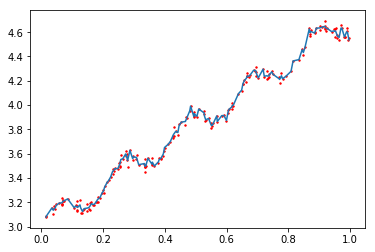

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0], s= 2, c='red')
plt.show()

In [22]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [23]:
abX, abY = loadDataSet('abalone.txt')

In [24]:
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)

In [25]:
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)

In [26]:
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

In [27]:
rssError(abY[0:99], yHat01.T)

56.78420911837208

In [28]:
rssError(abY[0:99], yHat1.T)

429.89056187030394

In [29]:
rssError(abY[0:99], yHat10.T)

549.1181708826065

In [30]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)

In [31]:
rssError(abY[100:199], yHat01.T)

25119.459111157415

In [32]:
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)

In [33]:
rssError(abY[100:199], yHat1.T)

573.5261441895706

In [34]:
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)

In [35]:
rssError(abY[100:199], yHat10.T)

517.5711905381745

In [36]:
ws = standRegres(abX[0:99], abY[0:99])

In [37]:
yHat = mat(abX[100:199]) * ws

In [38]:
rssError(abY[100:199], yHat.T.A)

518.6363153249365

In [39]:
# 岭回归
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye(shape(xMat)[1]) * lam
    if linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xArr, yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    
    # 数据标准化的过程
    yMean = mean(yMat,0) # 0表示在行这个轴上进行均值计算，返回矩阵，如果不加0则计算矩阵内所有元素均值，返回数值
    yMat = yMat - yMean
    xMeans = mean(xMat,0)
    xStd = std(xMat,0)
    xMat = (xMat - xMeans) / xStd
    
    # 在30个不同的lamda下进行测试
    numTestPts = 30
    wMat = zeros((numTestPts, shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, exp(i-10))
        wMat[i,:] = ws.T
        
    return wMat # 如果某个lamda对应的矩阵奇异，则返回的那一行w值全为nan

In [40]:
abX, abY = loadDataSet('abalone.txt')

In [41]:
ridgeWeights = ridgeTest(abX, abY)

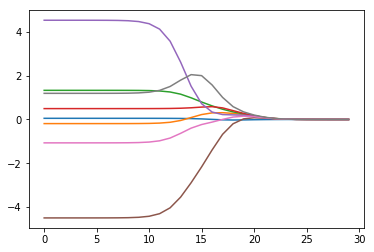

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights) # plot(matrix),矩阵每列作为一个向量画一条曲线
plt.show()

In [43]:
# 定义标准化函数
def regularize(X):
    xMean = mean(X,0)
    xStd = std(X,0)
    normX = (X - xMean) / xStd
    return normX

In [44]:
# 前向逐步线性回归
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = mat(xArr); yMat = mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean
    xMat = regularize(xMat) # 并没有regularize()这个函数，自己定义了这个标准化函数
    m, n = shape(xMat)
    returnMat = zeros((numIt,n))
    ws = zeros((n,1))
    for i in range(numIt):
        print(ws.T)
        lowestError = inf
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    
    return returnMat

In [45]:
xArr, yArr = loadDataSet('abalone.txt')

In [46]:
stageWeights1 = stageWise(xArr, yArr, 0.01, 200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.   0.   0.   0.   0.01]]
[[0.   0.   0.   0.   0.   0.   0.   0.02]]
[[0.   0.   0.   0.   0.   0.   0.   0.03]]
[[0.   0.   0.   0.   0.   0.   0.   0.04]]
[[0.   0.   0.   0.   0.   0.   0.   0.05]]
[[0.   0.   0.   0.   0.   0.   0.   0.06]]
[[0.   0.   0.   0.   0.   0.   0.   0.07]]
[[0.   0.   0.   0.   0.   0.   0.   0.08]]
[[0.   0.   0.   0.   0.   0.   0.   0.09]]
[[0.  0.  0.  0.  0.  0.  0.  0.1]]
[[0.   0.   0.   0.   0.   0.   0.   0.11]]
[[0.   0.   0.   0.   0.   0.   0.   0.12]]
[[0.   0.   0.   0.   0.   0.   0.   0.13]]
[[0.   0.   0.   0.   0.   0.   0.   0.14]]
[[0.   0.   0.   0.   0.   0.   0.   0.15]]
[[0.   0.   0.   0.   0.   0.   0.   0.16]]
[[0.   0.   0.   0.   0.   0.   0.   0.17]]
[[0.   0.   0.   0.   0.   0.   0.   0.18]]
[[0.   0.   0.   0.   0.   0.   0.   0.19]]
[[0.  0.  0.  0.  0.  0.  0.  0.2]]
[[0.   0.   0.   0.   0.   0.   0.   0.21]]
[[0.   0.   0.   0.   0.   0.   0.   0.22]]
[[0.   0.   0.   0. 

[[ 0.    0.    0.    0.31  0.   -0.04  0.    1.57]]
[[ 0.    0.    0.    0.31  0.   -0.04  0.    1.58]]
[[ 0.    0.    0.    0.31  0.   -0.05  0.    1.58]]
[[ 0.    0.    0.    0.32  0.   -0.05  0.    1.58]]
[[ 0.    0.    0.    0.32  0.   -0.06  0.    1.58]]
[[ 0.    0.    0.    0.32  0.   -0.06  0.    1.59]]
[[ 0.    0.    0.    0.32  0.   -0.07  0.    1.59]]
[[ 0.    0.    0.    0.32  0.   -0.07  0.    1.6 ]]


In [47]:
stageWeights2 = stageWise(xArr, yArr, 0.001, 5000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.    0.    0.    0.    0.001]]
[[0.    0.    0.    0.    0.    0.    0.    0.002]]
[[0.    0.    0.    0.    0.    0.    0.    0.003]]
[[0.    0.    0.    0.    0.    0.    0.    0.004]]
[[0.    0.    0.    0.    0.    0.    0.    0.005]]
[[0.    0.    0.    0.    0.    0.    0.    0.006]]
[[0.    0.    0.    0.    0.    0.    0.    0.007]]
[[0.    0.    0.    0.    0.    0.    0.    0.008]]
[[0.    0.    0.    0.    0.    0.    0.    0.009]]
[[0.   0.   0.   0.   0.   0.   0.   0.01]]
[[0.    0.    0.    0.    0.    0.    0.    0.011]]
[[0.    0.    0.    0.    0.    0.    0.    0.012]]
[[0.    0.    0.    0.    0.    0.    0.    0.013]]
[[0.    0.    0.    0.    0.    0.    0.    0.014]]
[[0.    0.    0.    0.    0.    0.    0.    0.015]]
[[0.    0.    0.    0.    0.    0.    0.    0.016]]
[[0.    0.    0.    0.    0.    0.    0.    0.017]]
[[0.    0.    0.    0.    0.    0.    0.    0.018]]
[[0.    0.    0.    0.    0.    0.    0.    

[[0.    0.    0.    0.    0.    0.    0.    0.261]]
[[0.    0.    0.    0.    0.    0.    0.    0.262]]
[[0.    0.    0.    0.    0.    0.    0.    0.263]]
[[0.    0.    0.    0.    0.    0.    0.    0.264]]
[[0.    0.    0.    0.    0.    0.    0.    0.265]]
[[0.    0.    0.    0.    0.    0.    0.    0.266]]
[[0.    0.    0.    0.    0.    0.    0.    0.267]]
[[0.    0.    0.    0.    0.    0.    0.    0.268]]
[[0.    0.    0.    0.    0.    0.    0.    0.269]]
[[0.   0.   0.   0.   0.   0.   0.   0.27]]
[[0.    0.    0.    0.    0.    0.    0.    0.271]]
[[0.    0.    0.    0.    0.    0.    0.    0.272]]
[[0.    0.    0.    0.    0.    0.    0.    0.273]]
[[0.    0.    0.    0.    0.    0.    0.    0.274]]
[[0.    0.    0.    0.    0.    0.    0.    0.275]]
[[0.    0.    0.    0.    0.    0.    0.    0.276]]
[[0.    0.    0.    0.    0.    0.    0.    0.277]]
[[0.    0.    0.    0.    0.    0.    0.    0.278]]
[[0.    0.    0.    0.    0.    0.    0.    0.279]]
[[0.   0.   0.   0. 

[[0.    0.    0.    0.    0.    0.    0.    0.566]]
[[0.    0.    0.    0.    0.    0.    0.    0.567]]
[[0.    0.    0.    0.    0.    0.    0.    0.568]]
[[0.    0.    0.    0.    0.    0.    0.    0.569]]
[[0.   0.   0.   0.   0.   0.   0.   0.57]]
[[0.    0.    0.    0.    0.    0.    0.    0.571]]
[[0.    0.    0.    0.    0.    0.    0.    0.572]]
[[0.    0.    0.    0.    0.    0.    0.    0.573]]
[[0.    0.    0.    0.    0.    0.    0.    0.574]]
[[0.    0.    0.    0.    0.    0.    0.    0.575]]
[[0.    0.    0.    0.    0.    0.    0.    0.576]]
[[0.    0.    0.    0.    0.    0.    0.    0.577]]
[[0.    0.    0.    0.    0.    0.    0.    0.578]]
[[0.    0.    0.    0.    0.    0.    0.    0.579]]
[[0.   0.   0.   0.   0.   0.   0.   0.58]]
[[0.    0.    0.    0.    0.    0.    0.    0.581]]
[[0.    0.    0.    0.    0.    0.    0.    0.582]]
[[0.    0.    0.    0.    0.    0.    0.    0.583]]
[[0.    0.    0.    0.    0.    0.    0.    0.584]]
[[0.    0.    0.    0.    0.

[[0.    0.    0.    0.    0.    0.    0.    0.768]]
[[0.    0.    0.    0.    0.    0.    0.    0.769]]
[[0.   0.   0.   0.   0.   0.   0.   0.77]]
[[0.    0.    0.    0.    0.    0.    0.    0.771]]
[[0.    0.    0.    0.    0.    0.    0.    0.772]]
[[0.    0.    0.    0.    0.    0.    0.    0.773]]
[[0.    0.    0.    0.    0.    0.    0.    0.774]]
[[0.    0.    0.    0.    0.    0.    0.    0.775]]
[[0.    0.    0.    0.    0.    0.    0.    0.776]]
[[0.    0.    0.    0.    0.    0.    0.    0.777]]
[[0.    0.    0.    0.    0.    0.    0.    0.778]]
[[0.    0.    0.    0.    0.    0.    0.    0.779]]
[[0.   0.   0.   0.   0.   0.   0.   0.78]]
[[0.    0.    0.    0.    0.    0.    0.    0.781]]
[[0.    0.    0.    0.    0.    0.    0.    0.782]]
[[0.    0.    0.    0.    0.    0.    0.    0.783]]
[[0.    0.    0.    0.    0.    0.    0.    0.784]]
[[0.    0.    0.    0.    0.    0.    0.    0.785]]
[[0.    0.    0.    0.    0.    0.    0.    0.786]]
[[0.    0.    0.    0.    0.

[[0.   0.   0.   0.   0.   0.   0.   0.98]]
[[0.    0.    0.    0.    0.    0.    0.    0.981]]
[[0.    0.    0.    0.    0.    0.    0.    0.982]]
[[0.    0.    0.    0.    0.    0.    0.    0.983]]
[[0.    0.    0.    0.    0.    0.    0.    0.984]]
[[0.    0.    0.    0.    0.    0.    0.    0.985]]
[[0.    0.    0.    0.    0.    0.    0.    0.986]]
[[0.    0.    0.    0.    0.    0.    0.    0.987]]
[[0.    0.    0.    0.    0.    0.    0.    0.988]]
[[0.    0.    0.    0.    0.    0.    0.    0.989]]
[[0.   0.   0.   0.   0.   0.   0.   0.99]]
[[0.    0.    0.    0.    0.    0.    0.    0.991]]
[[0.    0.    0.    0.    0.    0.    0.    0.992]]
[[0.    0.    0.    0.    0.    0.    0.    0.993]]
[[0.    0.    0.    0.    0.    0.    0.    0.994]]
[[0.    0.    0.    0.    0.    0.    0.    0.995]]
[[0.    0.    0.    0.    0.    0.    0.    0.996]]
[[0.    0.    0.    0.    0.    0.    0.    0.997]]
[[0.    0.    0.    0.    0.    0.    0.    0.998]]
[[0.    0.    0.    0.    0.

[[0.    0.    0.    0.    0.    0.    0.    1.153]]
[[0.    0.    0.    0.    0.    0.    0.    1.154]]
[[0.    0.    0.    0.    0.    0.    0.    1.155]]
[[0.    0.    0.    0.    0.    0.    0.    1.156]]
[[0.    0.    0.    0.    0.    0.    0.    1.157]]
[[0.    0.    0.    0.    0.    0.    0.    1.158]]
[[0.    0.    0.    0.    0.    0.    0.    1.159]]
[[0.   0.   0.   0.   0.   0.   0.   1.16]]
[[0.    0.    0.    0.    0.    0.    0.    1.161]]
[[0.    0.    0.    0.    0.    0.    0.    1.162]]
[[0.    0.    0.    0.    0.    0.    0.    1.163]]
[[0.    0.    0.    0.    0.    0.    0.    1.164]]
[[0.    0.    0.    0.    0.    0.    0.    1.165]]
[[0.    0.    0.    0.    0.    0.    0.    1.166]]
[[0.    0.    0.    0.    0.    0.    0.    1.167]]
[[0.    0.    0.    0.    0.    0.    0.    1.168]]
[[0.    0.    0.    0.    0.    0.    0.    1.169]]
[[0.   0.   0.   0.   0.   0.   0.   1.17]]
[[0.    0.    0.    0.    0.    0.    0.    1.171]]
[[0.    0.    0.    0.    0.

[[0.    0.    0.    0.042 0.    0.    0.    1.28 ]]
[[0.    0.    0.    0.043 0.    0.    0.    1.28 ]]
[[0.    0.    0.    0.043 0.    0.    0.    1.281]]
[[0.    0.    0.    0.044 0.    0.    0.    1.281]]
[[0.    0.    0.    0.044 0.    0.    0.    1.282]]
[[0.    0.    0.    0.045 0.    0.    0.    1.282]]
[[0.    0.    0.    0.045 0.    0.    0.    1.283]]
[[0.    0.    0.    0.046 0.    0.    0.    1.283]]
[[0.    0.    0.    0.046 0.    0.    0.    1.284]]
[[0.    0.    0.    0.047 0.    0.    0.    1.284]]
[[0.    0.    0.    0.047 0.    0.    0.    1.285]]
[[0.    0.    0.    0.048 0.    0.    0.    1.285]]
[[0.    0.    0.    0.048 0.    0.    0.    1.286]]
[[0.    0.    0.    0.049 0.    0.    0.    1.286]]
[[0.    0.    0.    0.049 0.    0.    0.    1.287]]
[[0.    0.    0.    0.05  0.    0.    0.    1.287]]
[[0.    0.    0.    0.05  0.    0.    0.    1.288]]
[[0.    0.    0.    0.051 0.    0.    0.    1.288]]
[[0.    0.    0.    0.051 0.    0.    0.    1.289]]
[[0.    0.  

[[0.    0.    0.    0.186 0.    0.    0.    1.424]]
[[0.    0.    0.    0.187 0.    0.    0.    1.424]]
[[0.    0.    0.    0.187 0.    0.    0.    1.425]]
[[0.    0.    0.    0.188 0.    0.    0.    1.425]]
[[0.    0.    0.    0.188 0.    0.    0.    1.426]]
[[0.    0.    0.    0.189 0.    0.    0.    1.426]]
[[0.    0.    0.    0.189 0.    0.    0.    1.427]]
[[0.    0.    0.    0.19  0.    0.    0.    1.427]]
[[0.    0.    0.    0.19  0.    0.    0.    1.428]]
[[0.    0.    0.    0.191 0.    0.    0.    1.428]]
[[0.    0.    0.    0.191 0.    0.    0.    1.429]]
[[0.    0.    0.    0.192 0.    0.    0.    1.429]]
[[0.    0.    0.    0.192 0.    0.    0.    1.43 ]]
[[0.    0.    0.    0.193 0.    0.    0.    1.43 ]]
[[0.    0.    0.    0.193 0.    0.    0.    1.431]]
[[0.    0.    0.    0.194 0.    0.    0.    1.431]]
[[0.    0.    0.    0.194 0.    0.    0.    1.432]]
[[0.    0.    0.    0.195 0.    0.    0.    1.432]]
[[0.    0.    0.    0.195 0.    0.    0.    1.433]]
[[0.    0.  

[[0.    0.    0.    0.268 0.    0.    0.    1.505]]
[[0.    0.    0.    0.268 0.    0.    0.    1.506]]
[[0.    0.    0.    0.269 0.    0.    0.    1.506]]
[[0.    0.    0.    0.269 0.    0.    0.    1.507]]
[[0.    0.    0.    0.27  0.    0.    0.    1.507]]
[[0.    0.    0.    0.27  0.    0.    0.    1.508]]
[[0.    0.    0.    0.271 0.    0.    0.    1.508]]
[[0.    0.    0.    0.271 0.    0.    0.    1.509]]
[[0.    0.    0.    0.272 0.    0.    0.    1.509]]
[[0.    0.    0.    0.272 0.    0.    0.    1.51 ]]
[[0.    0.    0.    0.273 0.    0.    0.    1.51 ]]
[[0.    0.    0.    0.273 0.    0.    0.    1.511]]
[[0.    0.    0.    0.274 0.    0.    0.    1.511]]
[[0.    0.    0.    0.274 0.    0.    0.    1.512]]
[[0.    0.    0.    0.275 0.    0.    0.    1.512]]
[[0.    0.    0.    0.275 0.    0.    0.    1.513]]
[[0.    0.    0.    0.276 0.    0.    0.    1.513]]
[[0.    0.    0.    0.276 0.    0.    0.    1.514]]
[[0.    0.    0.    0.277 0.    0.    0.    1.514]]
[[0.    0.  

[[ 0.     0.     0.     0.311  0.    -0.037  0.     1.57 ]]
[[ 0.     0.     0.     0.311  0.    -0.038  0.     1.57 ]]
[[ 0.     0.     0.     0.311  0.    -0.038  0.     1.571]]
[[ 0.     0.     0.     0.311  0.    -0.039  0.     1.571]]
[[ 0.     0.     0.     0.311  0.    -0.039  0.     1.572]]
[[ 0.     0.     0.     0.311  0.    -0.04   0.     1.572]]
[[ 0.     0.     0.     0.312  0.    -0.04   0.     1.572]]
[[ 0.     0.     0.     0.312  0.    -0.041  0.     1.572]]
[[ 0.     0.     0.     0.312  0.    -0.041  0.     1.573]]
[[ 0.     0.     0.     0.312  0.    -0.042  0.     1.573]]
[[ 0.     0.     0.     0.312  0.    -0.042  0.     1.574]]
[[ 0.     0.     0.     0.312  0.    -0.043  0.     1.574]]
[[ 0.     0.     0.     0.312  0.    -0.043  0.     1.575]]
[[ 0.     0.     0.     0.312  0.    -0.044  0.     1.575]]
[[ 0.     0.     0.     0.312  0.    -0.044  0.     1.576]]
[[ 0.     0.     0.     0.312  0.    -0.045  0.     1.576]]
[[ 0.     0.     0.     0.313  0.    -0.

[[ 0.     0.     0.     0.331  0.    -0.127  0.     1.643]]
[[ 0.     0.     0.     0.331  0.    -0.128  0.     1.643]]
[[ 0.     0.     0.     0.331  0.    -0.128  0.     1.644]]
[[ 0.     0.     0.     0.331  0.    -0.129  0.     1.644]]
[[ 0.     0.     0.     0.331  0.    -0.129  0.     1.645]]
[[ 0.     0.     0.     0.331  0.    -0.13   0.     1.645]]
[[ 0.     0.     0.     0.332  0.    -0.13   0.     1.645]]
[[ 0.     0.     0.     0.332  0.    -0.131  0.     1.645]]
[[ 0.     0.     0.     0.332  0.    -0.131  0.     1.646]]
[[ 0.     0.     0.     0.332  0.    -0.132  0.     1.646]]
[[ 0.     0.     0.     0.332  0.    -0.132  0.     1.647]]
[[ 0.     0.     0.     0.332  0.    -0.133  0.     1.647]]
[[ 0.     0.     0.     0.332  0.    -0.133  0.     1.648]]
[[ 0.     0.     0.     0.332  0.    -0.134  0.     1.648]]
[[ 0.     0.     0.     0.332  0.    -0.134  0.     1.649]]
[[ 0.     0.     0.     0.332  0.    -0.135  0.     1.649]]
[[ 0.     0.     0.     0.333  0.    -0.

[[ 0.     0.     0.     0.353  0.    -0.226  0.     1.723]]
[[ 0.     0.     0.     0.353  0.    -0.227  0.     1.723]]
[[ 0.     0.     0.     0.353  0.    -0.227  0.     1.724]]
[[ 0.     0.     0.     0.353  0.    -0.228  0.     1.724]]
[[ 0.     0.     0.     0.353  0.    -0.228  0.     1.725]]
[[ 0.     0.     0.     0.353  0.    -0.229  0.     1.725]]
[[ 0.     0.     0.     0.353  0.    -0.229  0.     1.726]]
[[ 0.     0.     0.     0.353  0.    -0.23   0.     1.726]]
[[ 0.     0.     0.     0.354  0.    -0.23   0.     1.726]]
[[ 0.     0.     0.     0.354  0.    -0.231  0.     1.726]]
[[ 0.     0.     0.     0.354  0.    -0.231  0.     1.727]]
[[ 0.     0.     0.     0.354  0.    -0.232  0.     1.727]]
[[ 0.     0.     0.     0.354  0.    -0.232  0.     1.728]]
[[ 0.     0.     0.     0.354  0.    -0.233  0.     1.728]]
[[ 0.     0.     0.     0.354  0.    -0.233  0.     1.729]]
[[ 0.     0.     0.     0.354  0.    -0.234  0.     1.729]]
[[ 0.     0.     0.     0.354  0.    -0.

[[ 0.     0.     0.     0.373  0.    -0.318  0.     1.798]]
[[ 0.     0.     0.     0.373  0.    -0.319  0.     1.798]]
[[ 0.     0.     0.     0.373  0.    -0.319  0.     1.799]]
[[ 0.     0.     0.     0.373  0.    -0.32   0.     1.799]]
[[ 0.     0.     0.     0.374  0.    -0.32   0.     1.799]]
[[ 0.     0.     0.     0.374  0.    -0.32   0.     1.8  ]]
[[ 0.     0.     0.     0.374  0.    -0.321  0.     1.8  ]]
[[ 0.     0.     0.     0.374  0.    -0.321  0.     1.801]]
[[ 0.     0.     0.     0.374  0.    -0.322  0.     1.801]]
[[ 0.     0.     0.     0.374  0.    -0.322  0.     1.802]]
[[ 0.     0.     0.     0.374  0.    -0.323  0.     1.802]]
[[ 0.     0.     0.     0.375  0.    -0.323  0.     1.802]]
[[ 0.     0.     0.     0.375  0.    -0.324  0.     1.802]]
[[ 0.     0.     0.     0.375  0.    -0.324  0.     1.803]]
[[ 0.     0.     0.     0.375  0.    -0.325  0.     1.803]]
[[ 0.     0.     0.     0.375  0.    -0.325  0.     1.804]]
[[ 0.     0.     0.     0.375  0.    -0.

[[ 0.     0.     0.016  0.384  0.    -0.387  0.     1.842]]
[[ 0.     0.     0.017  0.384  0.    -0.387  0.     1.842]]
[[ 0.     0.     0.017  0.384  0.    -0.388  0.     1.842]]
[[ 0.     0.     0.018  0.384  0.    -0.388  0.     1.842]]
[[ 0.     0.     0.018  0.384  0.    -0.389  0.     1.842]]
[[ 0.     0.     0.018  0.384  0.    -0.389  0.     1.843]]
[[ 0.     0.     0.018  0.384  0.    -0.39   0.     1.843]]
[[ 0.     0.     0.019  0.384  0.    -0.39   0.     1.843]]
[[ 0.     0.     0.019  0.384  0.    -0.391  0.     1.843]]
[[ 0.     0.     0.019  0.384  0.    -0.391  0.     1.844]]
[[ 0.     0.     0.019  0.384  0.    -0.392  0.     1.844]]
[[ 0.     0.     0.02   0.384  0.    -0.392  0.     1.844]]
[[ 0.     0.     0.02   0.384  0.    -0.393  0.     1.844]]
[[ 0.     0.     0.02   0.384  0.    -0.393  0.     1.845]]
[[ 0.     0.     0.02   0.384  0.    -0.394  0.     1.845]]
[[ 0.     0.     0.021  0.384  0.    -0.394  0.     1.845]]
[[ 0.     0.     0.021  0.384  0.    -0.

[[ 0.     0.     0.054  0.387  0.    -0.456  0.     1.872]]
[[ 0.     0.     0.054  0.388  0.    -0.456  0.     1.872]]
[[ 0.     0.     0.054  0.388  0.    -0.457  0.     1.872]]
[[ 0.     0.     0.055  0.388  0.    -0.457  0.     1.872]]
[[ 0.     0.     0.055  0.388  0.    -0.458  0.     1.872]]
[[ 0.     0.     0.055  0.388  0.    -0.458  0.     1.873]]
[[ 0.     0.     0.055  0.388  0.    -0.459  0.     1.873]]
[[ 0.     0.     0.056  0.388  0.    -0.459  0.     1.873]]
[[ 0.     0.     0.056  0.388  0.    -0.46   0.     1.873]]
[[ 0.     0.     0.056  0.388  0.    -0.46   0.     1.874]]
[[ 0.     0.     0.056  0.388  0.    -0.461  0.     1.874]]
[[ 0.     0.     0.057  0.388  0.    -0.461  0.     1.874]]
[[ 0.     0.     0.057  0.388  0.    -0.462  0.     1.874]]
[[ 0.     0.     0.057  0.388  0.    -0.462  0.     1.875]]
[[ 0.     0.     0.057  0.388  0.    -0.463  0.     1.875]]
[[ 0.     0.     0.058  0.388  0.    -0.463  0.     1.875]]
[[ 0.     0.     0.058  0.388  0.    -0.

[[ 0.     0.     0.103  0.393  0.    -0.548  0.     1.912]]
[[ 0.     0.     0.104  0.393  0.    -0.548  0.     1.912]]
[[ 0.     0.     0.104  0.393  0.    -0.549  0.     1.912]]
[[ 0.     0.     0.104  0.393  0.    -0.549  0.     1.913]]
[[ 0.     0.     0.104  0.393  0.    -0.55   0.     1.913]]
[[ 0.     0.     0.105  0.393  0.    -0.55   0.     1.913]]
[[ 0.     0.     0.105  0.393  0.    -0.551  0.     1.913]]
[[ 0.     0.     0.105  0.393  0.    -0.551  0.     1.914]]
[[ 0.     0.     0.105  0.393  0.    -0.552  0.     1.914]]
[[ 0.     0.     0.106  0.393  0.    -0.552  0.     1.914]]
[[ 0.     0.     0.106  0.393  0.    -0.553  0.     1.914]]
[[ 0.     0.     0.106  0.393  0.    -0.553  0.     1.915]]
[[ 0.     0.     0.106  0.393  0.    -0.554  0.     1.915]]
[[ 0.     0.     0.107  0.393  0.    -0.554  0.     1.915]]
[[ 0.     0.     0.107  0.393  0.    -0.555  0.     1.915]]
[[ 0.     0.     0.108  0.393  0.    -0.555  0.     1.915]]
[[ 0.     0.     0.108  0.393  0.    -0.

[[ 0.     0.     0.158  0.399  0.    -0.65   0.     1.956]]
[[ 0.     0.     0.158  0.399  0.    -0.65   0.     1.957]]
[[ 0.     0.     0.158  0.399  0.    -0.651  0.     1.957]]
[[ 0.     0.     0.159  0.399  0.    -0.651  0.     1.957]]
[[ 0.     0.     0.159  0.399  0.    -0.651  0.     1.958]]
[[ 0.     0.     0.159  0.399  0.    -0.652  0.     1.958]]
[[ 0.     0.     0.16   0.399  0.    -0.652  0.     1.958]]
[[ 0.     0.     0.16   0.399  0.    -0.653  0.     1.958]]
[[ 0.     0.     0.16   0.399  0.    -0.653  0.     1.959]]
[[ 0.     0.     0.16   0.399  0.    -0.654  0.     1.959]]
[[ 0.     0.     0.161  0.399  0.    -0.654  0.     1.959]]
[[ 0.     0.     0.161  0.399  0.    -0.655  0.     1.959]]
[[ 0.     0.     0.162  0.399  0.    -0.655  0.     1.959]]
[[ 0.     0.     0.162  0.399  0.    -0.656  0.     1.959]]
[[ 0.     0.     0.162  0.399  0.    -0.656  0.     1.96 ]]
[[ 0.     0.     0.162  0.399  0.    -0.657  0.     1.96 ]]
[[ 0.     0.     0.163  0.399  0.    -0.

[[ 0.     0.     0.213  0.405  0.    -0.751  0.     2.001]]
[[ 0.     0.     0.213  0.405  0.    -0.752  0.     2.001]]
[[ 0.     0.     0.213  0.405  0.    -0.752  0.     2.002]]
[[ 0.     0.     0.213  0.405  0.    -0.753  0.     2.002]]
[[ 0.     0.     0.214  0.405  0.    -0.753  0.     2.002]]
[[ 0.     0.     0.214  0.405  0.    -0.754  0.     2.002]]
[[ 0.     0.     0.215  0.405  0.    -0.754  0.     2.002]]
[[ 0.     0.     0.215  0.405  0.    -0.755  0.     2.002]]
[[ 0.     0.     0.215  0.405  0.    -0.755  0.     2.003]]
[[ 0.     0.     0.215  0.405  0.    -0.756  0.     2.003]]
[[ 0.     0.     0.216  0.405  0.    -0.756  0.     2.003]]
[[ 0.     0.     0.216  0.405  0.    -0.757  0.     2.003]]
[[ 0.     0.     0.216  0.405  0.    -0.757  0.     2.004]]
[[ 0.     0.     0.216  0.405  0.    -0.758  0.     2.004]]
[[ 0.     0.     0.217  0.405  0.    -0.758  0.     2.004]]
[[ 0.     0.     0.217  0.405  0.    -0.759  0.     2.004]]
[[ 0.     0.     0.217  0.405  0.    -0.

[[ 0.     0.     0.266  0.41   0.    -0.849  0.     2.044]]
[[ 0.     0.     0.266  0.41   0.    -0.85   0.     2.044]]
[[ 0.     0.     0.266  0.411  0.    -0.85   0.     2.044]]
[[ 0.     0.     0.266  0.411  0.    -0.851  0.     2.044]]
[[ 0.     0.     0.266  0.411  0.    -0.851  0.     2.045]]
[[ 0.     0.     0.266  0.411  0.    -0.852  0.     2.045]]
[[ 0.     0.     0.267  0.411  0.    -0.852  0.     2.045]]
[[ 0.     0.     0.267  0.411  0.    -0.853  0.     2.045]]
[[ 0.     0.     0.268  0.411  0.    -0.853  0.     2.045]]
[[ 0.     0.     0.268  0.411  0.    -0.854  0.     2.045]]
[[ 0.     0.     0.268  0.411  0.    -0.854  0.     2.046]]
[[ 0.     0.     0.268  0.411  0.    -0.855  0.     2.046]]
[[ 0.     0.     0.269  0.411  0.    -0.855  0.     2.046]]
[[ 0.     0.     0.269  0.411  0.    -0.856  0.     2.046]]
[[ 0.     0.     0.269  0.411  0.    -0.856  0.     2.047]]
[[ 0.     0.     0.269  0.411  0.    -0.857  0.     2.047]]
[[ 0.     0.     0.27   0.411  0.    -0.

[[ 0.     0.     0.32   0.416  0.    -0.95   0.     2.087]]
[[ 0.     0.     0.32   0.416  0.    -0.95   0.     2.088]]
[[ 0.     0.     0.32   0.416  0.    -0.951  0.     2.088]]
[[ 0.     0.     0.321  0.416  0.    -0.951  0.     2.088]]
[[ 0.     0.     0.321  0.416  0.    -0.952  0.     2.088]]
[[ 0.     0.     0.321  0.416  0.    -0.952  0.     2.089]]
[[ 0.     0.     0.321  0.416  0.    -0.953  0.     2.089]]
[[ 0.     0.     0.322  0.416  0.    -0.953  0.     2.089]]
[[ 0.     0.     0.322  0.416  0.    -0.954  0.     2.089]]
[[ 0.     0.     0.322  0.416  0.    -0.954  0.     2.09 ]]
[[ 0.     0.     0.322  0.416  0.    -0.955  0.     2.09 ]]
[[ 0.     0.     0.323  0.416  0.    -0.955  0.     2.09 ]]
[[ 0.     0.     0.323  0.417  0.    -0.955  0.     2.09 ]]
[[ 0.     0.     0.323  0.417  0.    -0.956  0.     2.09 ]]
[[ 0.     0.     0.323  0.417  0.    -0.956  0.     2.091]]
[[ 0.     0.     0.323  0.417  0.    -0.957  0.     2.091]]
[[ 0.     0.     0.324  0.417  0.    -0.

[[ 0.     0.     0.364  0.421  0.    -1.032  0.     2.123]]
[[ 0.     0.     0.364  0.421  0.    -1.032  0.     2.124]]
[[ 0.     0.     0.364  0.421  0.    -1.033  0.     2.124]]
[[ 0.     0.     0.365  0.421  0.    -1.033  0.     2.124]]
[[ 0.     0.     0.365  0.421  0.    -1.034  0.     2.124]]
[[ 0.     0.     0.365  0.421  0.    -1.034  0.     2.125]]
[[ 0.     0.     0.365  0.421  0.    -1.035  0.     2.125]]
[[ 0.     0.     0.366  0.421  0.    -1.035  0.     2.125]]
[[ 0.     0.     0.366  0.421  0.    -1.036  0.     2.125]]
[[ 0.     0.     0.366  0.421  0.    -1.036  0.     2.126]]
[[ 0.     0.     0.366  0.421  0.    -1.037  0.     2.126]]
[[ 0.     0.     0.367  0.421  0.    -1.037  0.     2.126]]
[[ 0.     0.     0.367  0.421  0.    -1.038  0.     2.126]]
[[ 0.     0.     0.368  0.421  0.    -1.038  0.     2.126]]
[[ 0.     0.     0.368  0.421  0.    -1.039  0.     2.126]]
[[ 0.     0.     0.368  0.421  0.    -1.039  0.     2.127]]
[[ 0.     0.     0.368  0.421  0.    -1.

[[ 0.     0.     0.418  0.427  0.    -1.133  0.     2.167]]
[[ 0.     0.     0.418  0.427  0.    -1.133  0.     2.168]]
[[ 0.     0.     0.418  0.427  0.    -1.134  0.     2.168]]
[[ 0.     0.     0.419  0.427  0.    -1.134  0.     2.168]]
[[ 0.     0.     0.419  0.427  0.    -1.135  0.     2.168]]
[[ 0.     0.     0.419  0.427  0.    -1.135  0.     2.169]]
[[ 0.     0.     0.419  0.427  0.    -1.136  0.     2.169]]
[[ 0.     0.     0.42   0.427  0.    -1.136  0.     2.169]]
[[ 0.     0.     0.42   0.427  0.    -1.137  0.     2.169]]
[[ 0.     0.     0.421  0.427  0.    -1.137  0.     2.169]]
[[ 0.     0.     0.421  0.427  0.    -1.137  0.     2.17 ]]
[[ 0.     0.     0.421  0.427  0.    -1.138  0.     2.17 ]]
[[ 0.     0.     0.421  0.428  0.    -1.138  0.     2.17 ]]
[[ 0.     0.     0.421  0.428  0.    -1.139  0.     2.17 ]]
[[ 0.     0.     0.422  0.428  0.    -1.139  0.     2.17 ]]
[[ 0.     0.     0.422  0.428  0.    -1.14   0.     2.17 ]]
[[ 0.     0.     0.422  0.428  0.    -1.

[[ 0.     0.     0.471  0.433  0.    -1.23   0.     2.21 ]]
[[ 0.     0.     0.471  0.433  0.    -1.231  0.     2.21 ]]
[[ 0.     0.     0.471  0.433  0.    -1.231  0.     2.211]]
[[ 0.     0.     0.471  0.433  0.    -1.232  0.     2.211]]
[[ 0.     0.     0.472  0.433  0.    -1.232  0.     2.211]]
[[ 0.     0.     0.472  0.433  0.    -1.233  0.     2.211]]
[[ 0.     0.     0.472  0.433  0.    -1.233  0.     2.212]]
[[ 0.     0.     0.472  0.433  0.    -1.234  0.     2.212]]
[[ 0.     0.     0.473  0.433  0.    -1.234  0.     2.212]]
[[ 0.     0.     0.473  0.433  0.    -1.235  0.     2.212]]
[[ 0.     0.     0.473  0.433  0.    -1.235  0.     2.213]]
[[ 0.     0.     0.473  0.433  0.    -1.236  0.     2.213]]
[[ 0.     0.     0.474  0.433  0.    -1.236  0.     2.213]]
[[ 0.     0.     0.474  0.433  0.    -1.237  0.     2.213]]
[[ 0.     0.     0.475  0.433  0.    -1.237  0.     2.213]]
[[ 0.     0.     0.475  0.433  0.    -1.238  0.     2.213]]
[[ 0.     0.     0.475  0.433  0.    -1.

[[ 0.     0.     0.514  0.437  0.    -1.312  0.     2.246]]
[[ 0.     0.     0.515  0.437  0.    -1.312  0.     2.246]]
[[ 0.     0.     0.515  0.437  0.    -1.313  0.     2.246]]
[[ 0.     0.     0.515  0.437  0.    -1.313  0.     2.247]]
[[ 0.     0.     0.515  0.437  0.    -1.314  0.     2.247]]
[[ 0.     0.     0.516  0.437  0.    -1.314  0.     2.247]]
[[ 0.     0.     0.516  0.437  0.    -1.315  0.     2.247]]
[[ 0.     0.     0.516  0.438  0.    -1.315  0.     2.247]]
[[ 0.     0.     0.516  0.438  0.    -1.316  0.     2.247]]
[[ 0.     0.     0.517  0.438  0.    -1.316  0.     2.247]]
[[ 0.     0.     0.517  0.438  0.    -1.316  0.     2.248]]
[[ 0.     0.     0.517  0.438  0.    -1.317  0.     2.248]]
[[ 0.     0.     0.518  0.438  0.    -1.317  0.     2.248]]
[[ 0.     0.     0.518  0.438  0.    -1.318  0.     2.248]]
[[ 0.     0.     0.518  0.438  0.    -1.318  0.     2.249]]
[[ 0.     0.     0.518  0.438  0.    -1.319  0.     2.249]]
[[ 0.     0.     0.519  0.438  0.    -1.

[[ 0.     0.     0.568  0.443  0.    -1.412  0.     2.29 ]]
[[ 0.     0.     0.569  0.443  0.    -1.412  0.     2.29 ]]
[[ 0.     0.     0.569  0.443  0.    -1.413  0.     2.29 ]]
[[ 0.     0.     0.569  0.444  0.    -1.413  0.     2.29 ]]
[[ 0.     0.     0.569  0.444  0.    -1.414  0.     2.29 ]]
[[ 0.     0.     0.569  0.444  0.    -1.414  0.     2.291]]
[[ 0.     0.     0.569  0.444  0.    -1.415  0.     2.291]]
[[ 0.     0.     0.57   0.444  0.    -1.415  0.     2.291]]
[[ 0.     0.     0.57   0.444  0.    -1.416  0.     2.291]]
[[ 0.     0.     0.571  0.444  0.    -1.416  0.     2.291]]
[[ 0.     0.     0.571  0.444  0.    -1.417  0.     2.291]]
[[ 0.     0.     0.571  0.444  0.    -1.417  0.     2.292]]
[[ 0.     0.     0.571  0.444  0.    -1.418  0.     2.292]]
[[ 0.     0.     0.572  0.444  0.    -1.418  0.     2.292]]
[[ 0.     0.     0.572  0.444  0.    -1.419  0.     2.292]]
[[ 0.     0.     0.572  0.444  0.    -1.419  0.     2.293]]
[[ 0.     0.     0.572  0.444  0.    -1.

[[ 0.     0.     0.611  0.448  0.    -1.493  0.     2.325]]
[[ 0.     0.     0.612  0.448  0.    -1.493  0.     2.325]]
[[ 0.     0.     0.612  0.448  0.    -1.494  0.     2.325]]
[[ 0.     0.     0.613  0.448  0.    -1.494  0.     2.325]]
[[ 0.     0.     0.613  0.448  0.    -1.495  0.     2.325]]
[[ 0.     0.     0.613  0.448  0.    -1.495  0.     2.326]]
[[ 0.     0.     0.613  0.448  0.    -1.496  0.     2.326]]
[[ 0.     0.     0.614  0.448  0.    -1.496  0.     2.326]]
[[ 0.     0.     0.614  0.448  0.    -1.497  0.     2.326]]
[[ 0.     0.     0.614  0.448  0.    -1.497  0.     2.327]]
[[ 0.     0.     0.614  0.448  0.    -1.498  0.     2.327]]
[[ 0.     0.     0.615  0.448  0.    -1.498  0.     2.327]]
[[ 0.     0.     0.615  0.448  0.    -1.499  0.     2.327]]
[[ 0.     0.     0.615  0.448  0.    -1.499  0.     2.328]]
[[ 0.     0.     0.615  0.448  0.    -1.5    0.     2.328]]
[[ 0.     0.     0.616  0.448  0.    -1.5    0.     2.328]]
[[ 0.     0.     0.616  0.449  0.    -1.

In [48]:
xMat = mat(xArr)
yMat = mat(yArr).T
xMat = regularize(xMat)
yM = mean(yMat,0)
yMat = yMat - yM
weights = standRegres(xMat, yMat.T)

In [49]:
weights.T

matrix([[ 0.05235616, -0.18938966,  1.33168957,  0.49619321,  4.53579572,
         -4.50107876, -1.06982725,  1.19429503]])

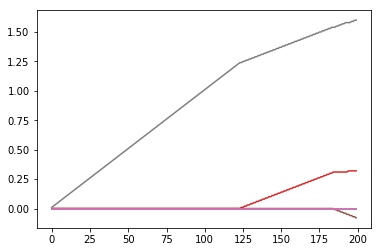

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(stageWeights1) 
plt.show()

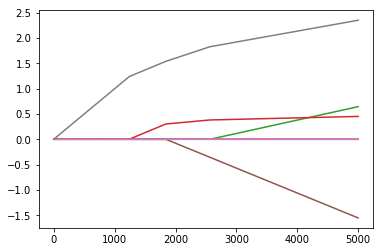

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(stageWeights2) 
plt.show()

示例：预测乐高玩具套装的价格 

In [52]:
from bs4 import BeautifulSoup

In [53]:
def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    '''
    函数说明：从页面读取数据，生成retX和retY列表
    Parameters:
        retX - 数据X
        retY - 数据Y
        inFile - HTML文件
        yr - 年份
        numPce - 乐高部件数目
        origPrc - 原价
    Returns:
        无
    '''
    # 打开并读取HTML文件
    with open(inFile, encoding = 'utf-8') as f:
        html = f.read()
    soup = BeautifulSoup(html)
    i = 1
    # 根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r='%d' % i)
    while(len(currentRow) != 0):
        currentRow = soup.find_all('table', r='%d' % i)
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        # 查找是否有全部标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1): # str.find(str)如果包含子字符串返回开始的索引值，否则返回-1。
            newFlag = 1.0
        else:
            newFlag = 0.0
        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldUnicde) == 0:
            print("商品 #%d 没有出售" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','')
            priceStr = priceStr.replace(',','') # 因为有1,000这样的数字
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping','')
            sellingPrice = float(priceStr)
            # 去掉不完整的套装价格
            if sellingPrice > origPrc * 0.5:
                print("%d\t%d\t%d\t%f\t%f" % (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i += 1
        currentRow = soup.find_all('table', r="%d" % i)
        
def setDataCollect(retX, retY):
    '''
    函数说明：依次读取六种乐高套装的数据，并生成数据矩阵
    Parameters:
        无
    Returns:
        无
    '''
    scrapePage(retX, retY, 'lego8288.html', 2006, 800, 49.99)
    scrapePage(retX, retY, 'lego10030.html', 2002, 3096, 269.99)
    scrapePage(retX, retY, 'lego10179.html', 2007, 5195, 499.99)
    scrapePage(retX, retY, 'lego10181.html', 2007, 3428, 199.99)
    scrapePage(retX, retY, 'lego10189.html', 2008, 5922, 299.99)
    scrapePage(retX, retY, 'lego10196.html', 2009, 3263, 249.99)

In [54]:
lgX = []
lgY = []
setDataCollect(lgX, lgY)

C:\Users\LeoWang\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\LeoWang\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


2006	800	0	49.990000	85.000000
2006	800	0	49.990000	102.500000
2006	800	0	49.990000	77.000000
商品 #4 没有出售
2006	800	0	49.990000	162.500000
2002	3096	0	269.990000	699.990000
2002	3096	0	269.990000	602.000000
2002	3096	0	269.990000	515.000000
2002	3096	0	269.990000	510.000000
2002	3096	0	269.990000	375.000000
2002	3096	1	269.990000	1050.000000
2002	3096	0	269.990000	740.000000
2002	3096	1	269.990000	759.000000
2002	3096	0	269.990000	730.000000
2002	3096	1	269.990000	750.000000
商品 #11 没有出售
2007	5195	0	499.990000	910.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	811.880000
商品 #4 没有出售
2007	5195	0	499.990000	1324.790000
2007	5195	1	499.990000	850.000000
2007	5195	1	499.990000	800.000000
2007	5195	0	499.990000	810.000000
2007	5195	1	499.990000	1075.000000
2007	5195	0	499.990000	1050.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	1342.310000
2007	5195	1	499.990000	1000.000000
2007	5195	0	499.990000	1780.000000
2007	5195	0	499.990000	750.000000
商品 #16 没有出售
200

In [55]:
shape(lgX)

(63, 4)

In [56]:
lgX1 = mat(ones((63,5)))

In [57]:
lgX1[:,1:5] = mat(lgX)

In [58]:
lgX[0]

[2006, 800, 0.0, 49.99]

In [59]:
lgX1[0]

matrix([[1.000e+00, 2.006e+03, 8.000e+02, 0.000e+00, 4.999e+01]])

In [61]:
ws = standRegres(lgX1, lgY)

In [62]:
ws

matrix([[ 5.53199701e+04],
        [-2.75928219e+01],
        [-2.68392234e-02],
        [-1.12208481e+01],
        [ 2.57604055e+00]])

In [63]:
lgX1[0] * ws

matrix([[76.07418828]])

In [65]:
lgX1[-1] * ws

matrix([[431.17797647]])

In [68]:
lgX1[43] * ws

matrix([[516.2073308]])

In [80]:
# 交叉验证测试岭回归
def crossValidation(xArr, yArr, numVal=10):
    m = len(yArr)
    indexList = list(range(m))
    errorMat = zeros((numVal,30))
    for i in range(numVal):
        trainX = []; trainY = []
        testX = []; testY = []
        random.shuffle(indexList) # 将序列的所有元素随机排序
        for j in range(m):
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX, trainY)
        
        # 对于每一个验证模型的30组回归系数
        for k in range(30):
            matTestX = mat(testX); matTrainX = mat(trainX)
            meanTrain = mean(matTrainX, 0)
            stdTrain = std(matTrainX, 0)
            matTestX = (matTestX - meanTrain) / stdTrain
            yEst = matTestX * mat(wMat[k,:]).T + mean(trainY)
            errorMat[i,k] = rssError(yEst.T.A, array(testY))
    meanErrors = mean(errorMat, 0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors == minMean)]
    print(bestWeights)
    xMat = mat(xArr); yMat = mat(yArr).T
    meanX = mean(xMat,0); stdX = std(xMat,0)
    unReg = bestWeights / stdX
    print("the best model from Ridge Regression is: \n", unReg)
    print("with constant term: ", -1 * sum(multiply(meanX,unReg)) + mean(yMat))
        

In [81]:
crossValidation(lgX, lgY, 10)

[[-65.59875938 -32.06114646  21.8726521  321.1108849 ]]
the best model from Ridge Regression is: 
 [[-3.05182897e+01 -2.27782543e-02  4.37508161e+01  2.35515972e+00]]
with constant term:  61219.06439755004


In [82]:
ridgeTest(lgX, lgY)

array([[-5.93105723e+01, -3.77765651e+01, -5.60970984e+00,
         3.51225926e+02],
       [-5.93107040e+01, -3.77756550e+01, -5.60969711e+00,
         3.51224829e+02],
       [-5.93110622e+01, -3.77731810e+01, -5.60966251e+00,
         3.51221845e+02],
       [-5.93120356e+01, -3.77664566e+01, -5.60956846e+00,
         3.51213734e+02],
       [-5.93146807e+01, -3.77481808e+01, -5.60931279e+00,
         3.51191690e+02],
       [-5.93218641e+01, -3.76985260e+01, -5.60861774e+00,
         3.51131792e+02],
       [-5.93413410e+01, -3.75637259e+01, -5.60672784e+00,
         3.50969135e+02],
       [-5.93939191e+01, -3.71985942e+01, -5.60158643e+00,
         3.50528204e+02],
       [-5.95341690e+01, -3.62155250e+01, -5.58758060e+00,
         3.49338528e+02],
       [-5.98962388e+01, -3.36113761e+01, -5.54929488e+00,
         3.46168796e+02],
       [-6.07495377e+01, -2.70020937e+01, -5.44379362e+00,
         3.37996144e+02],
       [-6.22803588e+01, -1.19405709e+01, -5.14906595e+00,
      